In [41]:
import pandas as pd


df= pd.read_excel('df_content.xlsx')
df.head()
len(df)

295

In [13]:
word_groups = [
    # About documents
['unreport', 'unreported', 'unreporting', 'unreports','report','reports', 'reported', 'reporting','misreport', 'misreports', 'misreported', 
'misreporting','nonreport', 'nonreports', 'nonreported', 'nonreporting' ,'non-report', 'non-reports', 'non-reporting', 'non-reported', 'non-reportable',
'non report', 'non reports', 'non reporting' , 'non reported','underreport', 'underreports', 'underreported', 'underreporting'],
['unrecord', 'unrecords', 'unrecorded', 'unrecording', 'record', 'records', 'recorded', 'recording', 'recordable','non-record', 
'non-records', 'non-recording', 'non-recorded', 'non-recordable'],['undocument','undocumented', 'undocumenting', 'undocuments'],
['misrepresent', 'misrepresented', 'misrepresenting', 'misreports', 'represent','represents', 'represented', 'representing' ],
['register', 'registers', 'registered', 'registering', 'unregister', 'unregisters', 'unregistered', 'unregistering'],
['log','logbook', 'logged','logs'],['declare', 'declaration', 'declares', 'declared', 'declaring', 'underdeclaration', 'under-declaration',
'undeclare', 'undeclares', 'undeclared', 'undeclareing' ],['label', 'mislabel', 'labeling', 'labeled', 'labels', 'mislabeling',
'mislabled', 'mislables'],['evade', 'evades', 'evading', 'evaded'],['disappear', 'disappears', 'disappeared', 'disappearing', 'appear',
'appears', 'appeared','appearing','reappear', 'reappears', 'reappeared', 'reappearing' ],
['reveal','reveals', 'revealed', 'revealing', 'discover','discovers', 'discovered', 'discovering', 'vanish', 'vanishs', 'vanished', 'vanishing' ],
['endanger','endangers', 'endangered', 'endangering', 'protect', 'protects', 'protected', 'protecting', 'restrict', 'restricts', 'restricted', 'restricting'],
['undisclose', 'undiscloses', 'undisclosing', 'undisclosed', 'disclose', 'discloses', 'disclosing', 'disclosed' ],
['ban','banned', 'banns', 'banning', 'restrict', 'restricts', 'restricted', 'restricting'],
['hide','hidden', 'hides', 'hiding'],['bypass', 'bypasses', 'bypassing', 'bypassed'],
['load', 'loaded', 'loads', 'loading', 'loaded','offloads','offloading', 'offloaded','offload', 'overload', 'overloads', 'overloaded' ,'overloading' ],
['vessel', 'ship', 'trawler', 'trawl', 'grid', 'protocol', 'device', 'devices', 'area', 'zone', 'boat', 'oceana','oceanic'],
# About being false
['false', 'falsify', 'falsifies', 'falsifying', 'falsifies', 'falsified', 'falsification', 'fake', 'manipulated', 'manipulate', 'manipulates', 'manipulating', 'manipulation'],
['fraud', 'fraudulence', 'hoax', 'illegal', 'inaccourate', 'fish', 'fishery', 'fisheries', 'fishing','news', 'marine'],
# About amounts
['volume', 'quota', 'exceed', 'exceeds', 'exceeded', 'exceeding', 'inflation'],
# Fish, Ocean, port 
['catch', 'bycatch', 'harvest', 'juvenile', 'invasive', 'monitor','monitoring'],
['farmed', 'farming', 'fine'], 
['ocean', 'sea', 'seas', 'water', 'navy', 'army', 'waters'],
['port', 'import', 'export', 'ports', 'imports', 'exports', 'imported', 'exported', 'importing', 'exporting'],
['transshipment'],
['landing', 'trade'],['selective', 'caught', 'catch', 'amount', 'by-catch','confiscate','transshipment','law','lawful'],    
# ['commercial', 'industrial'],
# Crime
['offend', 'offended', 'offends', 'violate', 'violates', 'violated', 'vifolation'],
['regulation', 'regulate', 'regulated', 'regulates', 'regulating', 'regulations', 'regulates', 'unregulate', 'unregulating', 'unregulates', 'unregulated'],
['alter', 'altering', 'alters', 'altered'],
['threaten', 'threatend', 'threatens', 'threatening'],
['exploit', 'exploited', 'exploiting', 'exploits'],
['impose', 'imposed', 'imposes', 'imposing'],
['detect', 'detecting', 'detected', 'detects', 'prosecute', 'prosecutes', 'prosecuted', 'prosecuting'],
['inspector', 'inspectors', 'inspect', 'inspects', 'inspected', 'inspecting','investigate', 'investigates', 'investigated',
 'investigating','investigator']]

In [4]:
import re 

###### clean_word is with a subroutine of rep_word_text, dealing with one group of words
def clean_word(text, group):
    if len(group) == 1:
        return text
    elif len(group) != 1:
        updated_text = text
        for i in range(1,len(group)):
            pattern = r'\b{}\b'.format(re.escape(group[i]))
            updated_text = re.sub(pattern, group[0], updated_text)
        return updated_text
    else:
        print("The word group is empty")
        return None

##### Here word_group_list is the list of word groups.
def rep_word_text(text, word_group_list):
    if len(word_group_list) != 0:
        new_text = text
        for i in range(len(word_group_list)):
            new_text = clean_word(new_text, word_group_list[i])
        return new_text
    else:
        print("the word group list is invalid")
        return None

In [6]:
keywords = ["".join(keyword_list[0]) for keyword_list in word_groups]

In [8]:
keywords, len(keywords)

(['unreport',
  'unrecord',
  'undocument',
  'misrepresent',
  'register',
  'log',
  'declare',
  'label',
  'evade',
  'disappear',
  'reveal',
  'endanger',
  'undisclose',
  'ban',
  'hide',
  'bypass',
  'load',
  'vessel',
  'false',
  'fraud',
  'volume',
  'catch',
  'farmed',
  'ocean',
  'port',
  'transshipment',
  'landing',
  'selective',
  'offend',
  'regulation',
  'alter',
  'threaten',
  'exploit',
  'impose',
  'detect',
  'inspector'],
 36)

In [16]:
query_vectors = vectorizer.transform(df['Query'].tolist())
query_vectors.shape

(295, 18106)

In [18]:
keywords_vectors = vectorizer.transform(keywords)
keywords_vectors.shape

(36, 18106)

In [19]:
cosine_similarity(keywords_vector, query_vectors)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 

In [26]:
num_keywords = len(keywords)

for i in range(len(df)):
    query_vector = query_vectors[i]
    title_vector = title_vectors[i]
    content_vector = content_vectors[i]
   # keywords_vector = keywords_vectors[i]
    

    #rs_title = cosine_similarity(query_vector, title_vector)[0][0]
    rs_content_q = cosine_similarity(query_vector, content_vector)[0][0]
    #rs_content_kw = cosine_similarity(keywords_vector, content_vector)[0][0]
    
     # Calculate the average similarity score for the keyword groups
    rs_content_kw = 0
    for j in range(len(keywords)):
        keywords_vector = keywords_vectors[j]
        rs_content_kw += cosine_similarity(keywords_vector, content_vector)[0][0]
        rs_title = cosine_similarity(keywords_vector, title_vector)[0][0]
    #rs_content_kw /= len(keywords)  # Average similarity for all keyword groups
    #rs_title /= len(keywords)
    print(rs_content_kw,rs_title)
    

0.10219888988450769 0.0
0.3025937922394204 0.0
0.14039643954048736 0.0
0.008517672991135183 0.0
0.04126854324666494 0.0
0.044321626381690474 0.0
0.0 0.0
0.204309898484531 0.0
0.10418759663896947 0.0
0.19891422523272642 0.0
0.039825911258202305 0.0
0.03515888128114762 0.0
0.0 0.0
0.23960475391693437 0.0
0.262828621187989 0.0
0.23133325615912284 0.0
0.14683263593662263 0.0
0.19853870115366207 0.0
0.06798969660085338 0.0
0.05790262561086186 0.0
0.1556295278797505 0.0
0.16118726234451483 0.0
0.1450239537251558 0.0
0.10156435974969152 0.0
0.06316714810515298 0.0
0.09860269874735228 0.0
0.07036800958739135 0.0
0.04930037798336645 0.0
0.1309923731168518 0.0
0.073255076268446 0.0
0.10447393044152542 0.0
0.07253693750931747 0.0
0.08169439871574202 0.0
0.0 0.0
0.12789138825608778 0.0
0.09079100695783332 0.0
0.07129705980450421 0.0
0.21790889947826633 0.0
0.10856518842990404 0.0
0.03660743588566674 0.0
0.0741520192336529 0.0
0.06442785947508153 0.0
0.0 0.0
0.03670505014964074 0.0
0.05852949675804

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Flatten the list of keywords

#keywords = [" ".join(keyword_list) for keyword_list in word_groups]

#[keyword for sublist in word_groups for keyword in sublist]

# Fill None values with an empty string
df = df.fillna('no content')


keywords = ["".join(keyword_list[0]) for keyword_list in word_groups]

# Initialize the vectorizer
vectorizer = TfidfVectorizer()


# Combine all text data (queries, titles, and content) for consistent vectorization
#all_texts = df['Query'].tolist() + df['Title'].tolist() \
#+ df['Content'].tolist()+ keywords
all_texts = df['Query'].tolist() + df['Title'].tolist() + df['Content'].tolist()+ keywords



for text in all_texts:
    #rep_word_text(text, word_groups)
    text = rep_word_text(text, word_groups)

# Fit the vectorizer on all texts
vectorizer.fit(all_texts)

# Transform queries, titles, and content separately
query_vectors = vectorizer.transform(df['Query'].tolist())
title_vectors = vectorizer.transform(df['Title'].tolist())
content_vectors = vectorizer.transform(df['Content'].tolist())
keywords_vectors = vectorizer.transform(keywords)



# Calculate cosine similarity
relevance_scores_title = []
relevance_scores_content = []
relevance_scores_keywords = []

num_documents = len(df)
num_keywords = len(keywords)

for i in range(len(df)):
    query_vector = query_vectors[i]
    title_vector = title_vectors[i]
    content_vector = content_vectors[i]
   # keywords_vector = keywords_vectors[i]
    

    #rs_title = cosine_similarity(query_vector, title_vector)[0][0]
    rs_content_q = cosine_similarity(query_vector, content_vector)[0][0]
    #rs_content_kw = cosine_similarity(keywords_vector, content_vector)[0][0]
    
     # Calculate the average similarity score for the keyword groups
    rs_content_kw = 0
    for j in range(len(keywords)):
        keywords_vector = keywords_vectors[j]
        rs_content_kw += cosine_similarity(keywords_vector, content_vector)[0][0]
        rs_title += cosine_similarity(keywords_vector, title_vector)[0][0]
    rs_content_kw /= len(keywords)  # Average similarity for all keyword groups
    rs_title /= len(keywords)

    relevance_scores_title.append(rs_title*100)
    relevance_scores_content.append(rs_content_q*100)
    relevance_scores_keywords.append(rs_content_kw*100)

# Add relevance scores to the DataFrame
df['rs_title'] = relevance_scores_title
df['rs_content_q'] = relevance_scores_content
df['rs_content_kw'] = relevance_scores_keywords


df.head()

,Query,Engine,Title,Dates,Link,Content,rs_title,rs_content_q,rs_content_kw
0,Vessel caught misreporting catch amount,Google,Sea Shepherd Global,2 weeks ago,https://www.seashepherdglobal.org/latest-news/...,"Wednesday, 05 Jun, 2024 Sea Shepherd Global s...",0.0,0.713969,0.283886
1,Vessel caught misreporting catch amount,Google,Move the IUU Fight Up the Food Chain | Proceed...,"Oct 31, 2023",https://www.usni.org/magazines/proceedings/202...,Drifting among the ice fields of the Bering S...,0.0,2.521825,0.840538
2,Vessel caught misreporting catch amount,Google,New rules tighten controls on EU…,1 month ago,https://ejfoundation.org/news-media/new-rules-...,"Today, the Environmental Justice Foundation c...",0.0,2.042278,0.389990
3,Vessel caught misreporting catch amount,Google,Surprise! Media is misreporting the source of ...,"Jul 26, 2023",https://electrek.co/2023/07/26/surprise-media-...,"Early this morning, the Fremantle Highway, a ...",0.0,1.579487,0.023660
4,Vessel caught misreporting catch amount,Google,Sea Shepherd Global,"Mar 25, 2024",https://www.seashepherdglobal.org/latest-news/...,"Monday, 25 Mar, 2024 In a decisive strike aga...",0.0,1.934369,0.114635


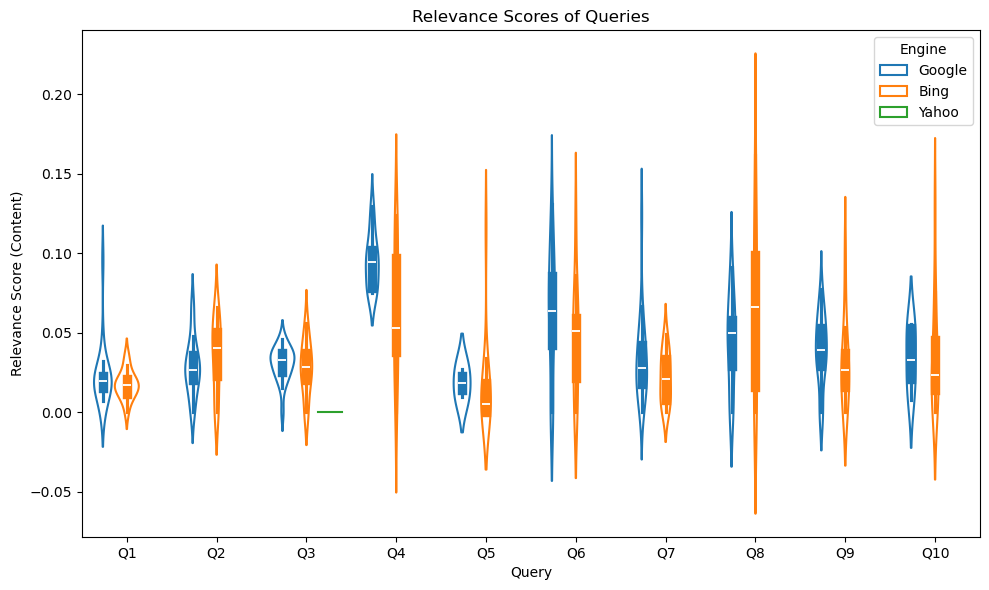

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate query names Q1, Q2, ..., Q10
query_names = [f'Q{i}' for i in range(1, 11)]  # Adjust range as per your actual number of queries

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Query", y="rs_content_q", hue="Engine", fill=False)
plt.xticks(ticks=range(len(query_names)), labels=query_names)  # Set xticks with query names
plt.xlabel('Query')
plt.ylabel('Relevance Score (Content)')
plt.title('Relevance Scores of Queries')
plt.legend(title='Engine', loc='upper right')
plt.tight_layout()
plt.show()

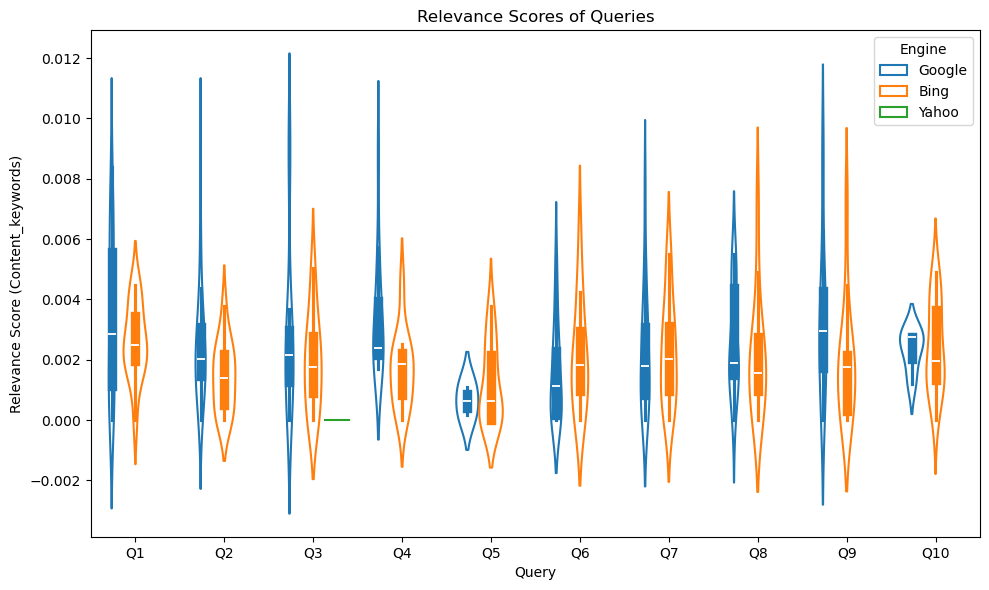

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


# Generate query names Q1, Q2, ..., Q10
query_names = [f'Q{i}' for i in range(1, 11)]  # Adjust range as per your actual number of queries

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="Query", y="rs_content_kw", hue="Engine", fill=False)
plt.xticks(ticks=range(len(query_names)), labels=query_names)  # Set xticks with query names
plt.xlabel('Query')
plt.ylabel('Relevance Score (Content_keywords)')
plt.title('Relevance Scores of Queries')
plt.legend(title='Engine', loc='upper right')
plt.tight_layout()
plt.show()
